<a href="https://colab.research.google.com/github/Shahilasulthana/DeepLearning/blob/main/Backpropagation_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.99k/0.99k [00:00<00:00, 1.51MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


In [18]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1"
os.listdir(dataset_path)


['IRIS.csv']

In [19]:
import pandas as pd

file_path = dataset_path + "/IRIS.csv"
df = pd.read_csv(file_path)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
X = df.drop("species", axis=1)
y = df["species"]


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [23]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical,
    test_size=0.2,
    random_state=42
)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [30]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.1
)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9694 - loss: 0.0630 - val_accuracy: 0.9167 - val_loss: 0.1863
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9830 - loss: 0.0564 - val_accuracy: 0.9167 - val_loss: 0.1794
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9739 - loss: 0.0525 - val_accuracy: 0.9167 - val_loss: 0.1858
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9877 - loss: 0.0451 - val_accuracy: 0.9167 - val_loss: 0.1869
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9695 - loss: 0.0895 - val_accuracy: 0.9167 - val_loss: 0.1857
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9780 - loss: 0.0598 - val_accuracy: 0.9167 - val_loss: 0.1810
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9809 - loss: 0.0400 - val_accuracy: 0.9167 - val_loss: 0.1850
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9914 - loss: 0.0673 - val_accuracy: 0.9167 - v

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0390
Test Accuracy: 1.0


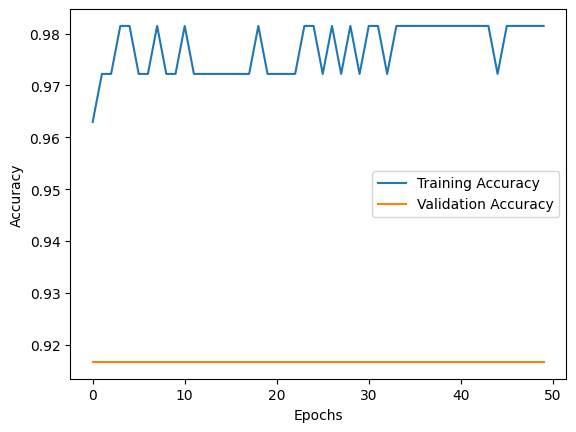

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
